In [1]:
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import wquantiles
import statsmodels.api as sm

Within this table, I will be computing a number of common metrics and estimates, including the mean, median, weighted and trimmed mean and weighted median. 

In [2]:
states = pd.read_csv('state.csv')
states.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [3]:
states.rename(columns={'Murder.Rate':'Murder_rate'}, inplace=True)
mean = states.Murder_rate.mean()
trim_mean = stats.trim_mean(states.Murder_rate, 0.1)
median = states.Murder_rate.median()

print(round(mean,2), round(trim_mean,2), median)


4.07 3.94 4.0


In this situation the trimmed mean has removed the top and bottom five states from the mean calculations and is therefore less susceptible to outliers and is more robust. Due to the small size of the dataset, this difference is negligible between all these values. If we want to compute the average murder rate for the country, we need to use a weighted mean or median to account for the differing populations between the states. 

In [4]:
weighted_mean = np.average(states.Murder_rate, weights=states.Population)
weighted_median = wquantiles.median(states.Murder_rate, weights=states.Population)
print(round(weighted_mean,2),weighted_median)

4.45 4.4


Here I group the average murder rates by the first letter of the state name, essentially combining all the A states into one variable and so on. Whilst the dataset is too small for any real insight as some letters have 4 times as many states than others (only Hawaii starts with an H and there are 4 A states), it's still interesting to see how the murder rate varies just by the difference in what the name begins with. 
There also isn't much point to using the trimmed mean, but I left it here to refer back to if I need the syntax for another project.

In [5]:
states['first_letter'] = states.Abbreviation.apply(lambda x: x[0])
states_abbrev = states.groupby(['first_letter']).Murder_rate.apply(lambda x: stats.trim_mean(x,0.1)).reset_index()
states_abbrev = states_abbrev.round(1)
states_abbrev.head()

,first_letter,Murder_rate
0,A,5.4
1,C,3.2
2,D,5.8
3,F,5.8
4,G,5.7


In [6]:
print(round(states_abbrev.Murder_rate.mean(),2))
print(round(states_abbrev.Murder_rate.sum(),2))
average_pct = (states_abbrev.Murder_rate.mean()/states_abbrev.Murder_rate.sum())*100
print(str(round(average_pct,2)) + '%')

4.28
81.4
5.26%


Here I create a basic pie chart to try and visually show the distribution of the murder rates grouped by first letter from the table above. It becomes more apparent the difference between 'L' with 13% and the majority of the other states, as the average murder rate is around 5%. 

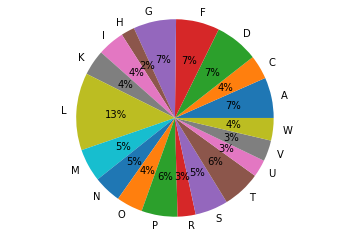

In [7]:
fig, ax = plt.subplots()
ax.pie(states_abbrev.Murder_rate, labels=states_abbrev.first_letter, autopct='%1.0f%%')
ax.axis('equal')
plt.show()
plt.close()

Here I am finding another dimension of statistics surrounding the data, that of variability or dispersion. This shows how clustered or spread out the data values are. 

In [8]:
print("Mean = " + str(round(states.Population.mean(), 2)))
print("Standard Deviation = " + str(round(states.Population.std(),2)))
print("Interquartile Range = " + str(states.Population.quantile(0.75) - states.Population.quantile(0.25)))
print("The Mean Absolute Deviation = " + str(round(states.Population.mad(), 2)))
print("The Median Absolute Deviation = " + str(round(sm.robust.scale.mad(states.Population),2)))
print("The Median Absolute Deviation scaled to the same scale of the STD = "
      + str(round(sm.robust.scale.mad(states.Population)*1.4826,2)) + ". In a normal distribution, 50% of values will   fall + or - within the range of the MAD")

Mean = 6162876.3
Standard Deviation = 6848235.35
Interquartile Range = 4847308.0
The Mean Absolute Deviation = 4450933.36
The Median Absolute Deviation = 3849876.15
The Median Absolute Deviation scaled to the same scale of the STD = 5707826.37. In a normal distribution, 50% of values will   fall + or - within the range of the MAD


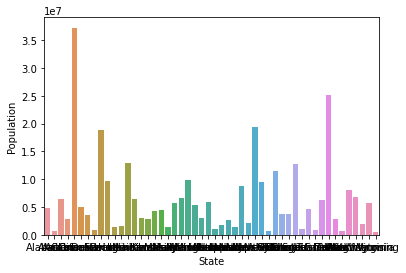

In [9]:
fig, ax = plt.subplots()
sns.barplot(data=states, x='State', y='Population')
plt.show()

In [11]:
states['bins'] = pd.cut(states['Population'], 10)

binz = states.groupby('bins')['Abbreviation'].agg(Count='count', Abbrev='unique').reset_index()
binz


,bins,Count,Abbrev
0,"(526935.67, 4232659.0]",24,"[AK, AR, CT, DE, HI, ID, IA, KS, ME, MS, MT, N..."
1,"(4232659.0, 7901692.0]",14,"[AL, AZ, CO, IN, KY, LA, MD, MA, MN, MO, SC, T..."
2,"(7901692.0, 11570725.0]",6,"[GA, MI, NJ, NC, OH, VA]"
3,"(11570725.0, 15239758.0]",2,"[IL, PA]"
4,"(15239758.0, 18908791.0]",1,[FL]
5,"(18908791.0, 22577824.0]",1,[NY]
6,"(22577824.0, 26246857.0]",1,[TX]
7,"(26246857.0, 29915890.0]",0,[]
8,"(29915890.0, 33584923.0]",0,[]
9,"(33584923.0, 37253956.0]",1,[CA]


Here is a histogram of the above frequency table.

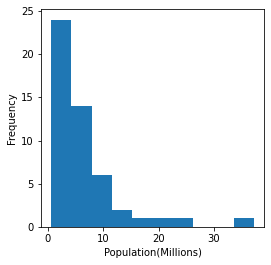

In [12]:
ax = (states['Population']/1000000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population(Millions)')
plt.show()

In [13]:
states[['Population', 'Murder_rate']].corr()

,Population,Murder_rate
Population,1.000000,0.182069
Murder_rate,0.182069,1.000000
